Q1. Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:
1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
Max = pd.Series([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = pd.Series([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month = pd.Series(np.arange(1,13))

In [92]:
df = pd.concat((month, Max, Min),axis = 1)


In [90]:
df.rename(columns ={0 : 'Month',1: 'Max_temp', 2: 'Min_temp'}, inplace = True)
df.set_index('Month')

,Max_temp,Min_temp
Month,,
1,39,21
2,41,23
3,43,27
4,47,28
5,49,32
6,51,35
7,45,31
8,38,28
9,37,21


In [35]:
df.describe()

,Month,Max_temp,Min_temp
count,12.000000,12.000000,12.00000
mean,6.500000,39.250000,25.00000
std,3.605551,8.571889,5.96962
min,1.000000,25.000000,17.00000
25%,3.750000,35.000000,20.50000
50%,6.500000,40.000000,25.00000
75%,9.250000,45.500000,28.75000
max,12.000000,51.000000,35.00000


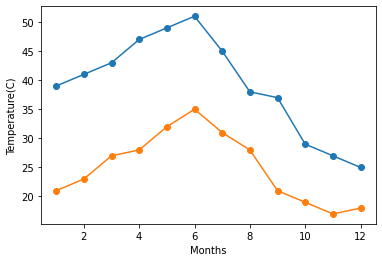

In [44]:
plt.scatter(df.Month,df.Max_temp)
plt.plot(df.Month,df.Max_temp)
plt.scatter(df.Month,df.Min_temp)
plt.plot(df.Month,df.Min_temp)
plt.ylabel("Temperature(C)")
plt.xlabel("Months")
plt.show()

In [85]:
#fitting the periodic function
from scipy.optimize import curve_fit
months = np.arange(12)
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])
print(res_max)
print(res_min)
print(cov_max)
print(cov_min)

[ 39.10062829 -11.08724928   2.10332481]
[24.87112259 -7.8989966   1.60673367]
[[0.66228818 0.01819673 0.00307791]
 [0.01819673 1.3255596  0.0045694 ]
 [0.00307791 0.0045694  0.04074436]]
[[0.20011361 0.00665861 0.00092116]
 [0.00665861 0.40433319 0.00165614]
 [0.00092116 0.00165614 0.02402399]]


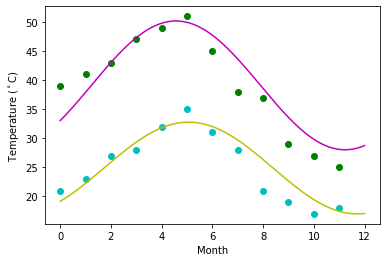

In [91]:
#2.plot the fit
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Q2. titanic = pd.read_csv(url)

Charts to plot:
    
1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [45]:
df1 = pd.read_csv(r'D:\DataScience\Data\Titanic_Original.txt')

In [47]:
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [54]:
s = pd.DataFrame((df1['sex'].value_counts())/len(df1)*100)
s

,sex
male,64.351145
female,35.572519


In [56]:
label = ['Male', 'Female']

([<matplotlib.patches.Wedge at 0x1cd76e76fd0>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'Male'),
  Text(0.5026928922888523, -1.0343112955209706, 'Female')],
 [Text(-0.21856216918611415, 0.449700542806722, '64.40'),
  Text(0.24041833979032068, -0.49467061959698594, '35.60')])

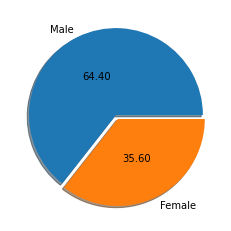

In [69]:
plt.pie(df1['sex'].value_counts(), labels = label,explode = [0,0.05] ,autopct = '%.2f',pctdistance=0.5,shadow=True)

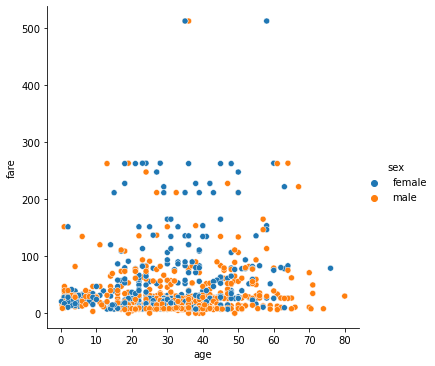

In [76]:
#Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
import seaborn as sns
sns.relplot(x ='age', y = 'fare', hue = 'sex', data = df1)